In [43]:
# ほぼ、ここと同じ
# http://gratk.hatenablog.jp/entry/2017/12/11/231604
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# データの読み込み
txt_file = '~/myproj/study_ml/IADML/data/qtdbsel102.txt'

df = pd.read_csv(txt_file, sep="\t", header=None)

normal_data = df.loc[:2999, 2].values
anomaly_data = df.loc[3000:5999, 2].values

w = 100

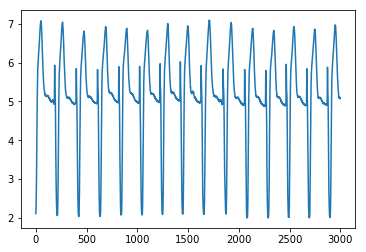

In [44]:
plt.plot(normal_data)

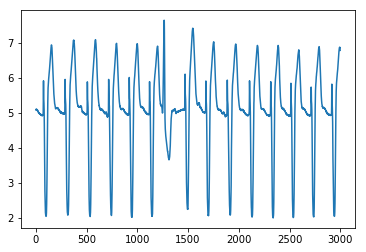

In [45]:
plt.plot(anomaly_data)

In [47]:
# 部分時系列の作成
def embed(x, w):
    t = x.shape[0]
    n = t-w+1
    pts = np.zeros((n,w))
    for i in range(n):
        window = x[i:i+w]
        pts[i,:] = window.T
    
    return pts
    
train_data = embed(normal_data, w)
test_data = embed(anomaly_data, w)

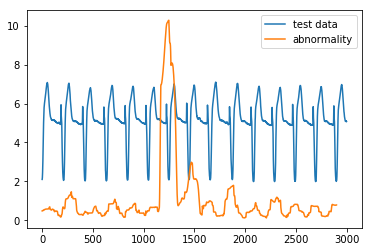

In [50]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(train_data)
distances, indices = nbrs.kneighbors(test_data)

# テストデータと異常度のプロット
plt.plot(normal_data)
plt.plot(distances)
plt.legend(["test data", "abnormality"])

## FFTでできないの？


In [51]:
normal_spec = np.fft.fft(normal_data)
anomaly_spec = np.fft.fft(anomaly_data)

c:\anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


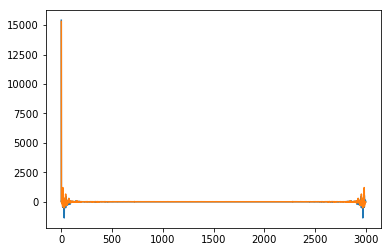

In [52]:
plt.plot(normal_spec)
plt.plot(anomaly_spec)

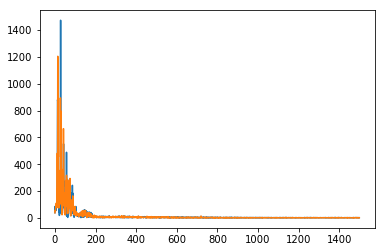

In [58]:
# 低周波成分を除去して、絶対値を取って、折り返しを無くして見やすく
plt.plot(abs(normal_spec[1:1500]))
plt.plot(abs(anomaly_spec[1:1500]))


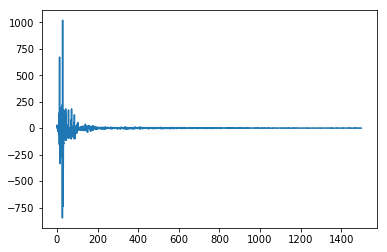

In [57]:
# 差分のプロット
plt.plot(abs(normal_spec[1:1500]) - abs(anomaly_spec[1:1500]))